In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist, cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# fashion_mnist dataset 로드
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


### 1. 로드한 이미지의 특징에 대해 간단히 서술하시오. (가로/세로 픽셀 수 및 채널)

[정답] CIFAR-10 dataset은 32x32픽셀의 60000개 컬러이미지가 포함되어 있으며, 각 이미지는 10개의 클래스로 라벨링이 되어있습니다.

### 2. training data와 test data의 수는 각각 몇 개의 이미지인가?

[정답] 각각 50000개와 10000개의 이미지이다.

### 3. 로드한 데이터는 총 몇 개의 class로 구성되어 있는가? (hint: y의 최소값 및 최대값)

[정답] 10개의 클래스이다.

### 4. 아래와 같은 순서의 CNN 모델을 구성하시오.

- 1) Convolution layer 3x3 kernels 32개
- 2) Max Pooling layer 2x2 window
- 3) Convolution layer 2x2 kernels 32개
- 4) Max Pooling layer 2x2 window
- 5) Flatten layer
- 6) 이후 layer는 자유롭게 구성

In [ ]:
CNN_model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32,kernel_size=(2,2)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten()
])

### 5. CNN을 구성하는 convolutional layer와 pooling layer의 역할에 대해 간단히 설명하시오.

[정답] convolutional layer는 2D 형태의 특정한 크기를 가지는 필터로 이미지 전체를 슬라이딩 하면서 합성곱 연산을 수행하며, pooling layer는 합성곱 계층의 출력 데이터를 입력으로 받아서 출력 데이터의 크기를 줄이거나 특정 데이터를 강조합니다.

### 6. 이미지 데이터(x_train과 x_test) 각 픽셀의 최대값과 최소값을 얼마인가?

[정답] 255와 0이다.

### 7. 이미지 데이터(x_train과 x_test)의 값이 0과 1사이의 값이 되도록 정규화 하는 코드를 작성하시오.

- 정규화된 데이터를 Xtrain과 Xtest에 저장하시오.

In [ ]:
# 코드 작성
Xtrain = x_train/255
Xtest = x_test/255

### 8. compile 및 학습하시오. (batch size는 300이상, epochs은 30 내외로 설정하고, 학습데이터의 30%(0.3)을 검증(validation)에 이용하시오.)

In [ ]:
# 코드 작성
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

cifar10_result = CNN_model.fit(Xtrain, y_train, epochs=30, batch_size=300, validation_split=0.3)

Epoch 1/30
117/117 [==============================] - 37s 309ms/step - loss: 9.6594 - acc: 7.4286e-04 - val_loss: 9.4481 - val_acc: 8.6667e-04
Epoch 2/30
117/117 [==============================] - 34s 295ms/step - loss: 9.4048 - acc: 9.1429e-04 - val_loss: 9.0406 - val_acc: 8.0000e-04
Epoch 3/30
117/117 [==============================] - 47s 401ms/step - loss: 9.1801 - acc: 0.0015 - val_loss: 9.1009 - val_acc: 0.0017
Epoch 4/30
117/117 [==============================] - 44s 378ms/step - loss: 9.1444 - acc: 0.0017 - val_loss: 9.0881 - val_acc: 0.0017
Epoch 5/30
117/117 [==============================] - 39s 331ms/step - loss: 9.1331 - acc: 0.0017 - val_loss: 9.0638 - val_acc: 0.0017
Epoch 6/30
117/117 [==============================] - 36s 312ms/step - loss: 9.1154 - acc: 0.0017 - val_loss: 9.0618 - val_acc: 0.0017
Epoch 7/30
117/117 [==============================] - 34s 288ms/step - loss: 9.1044 - acc: 0.0017 - val_loss: 9.0504 - val_acc: 0.0017
Epoch 8/30
117/117 [===================

### 9. 위에서 생성한 model에 x_test 이미지를 적용했을 때의 정확도를 구하시오.

In [ ]:
# 코드 작성
# 정확도: ??
CNN_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 11.3232 - acc: 8.0000e-04


[11.323161125183105, 0.0007999999797903001]

### 10. 잘못 분류된 이미지 데이터 3개를 plot하고 실제 class와 예측한 class의 결과를 함께 보여주시오.

313/313 [==============================] - 3s 9ms/step


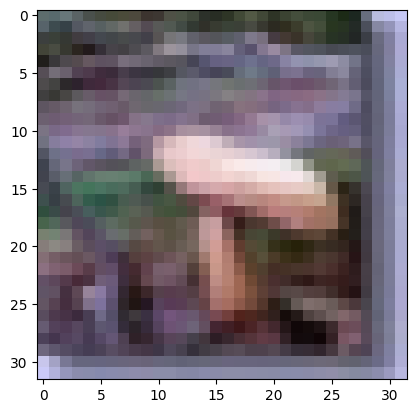

In [ ]:
# 코드 작성
pred_proba = CNN_model.predict(Xtest)
pred = np.argmax(pred_proba, axis=1)

y_test.ravel()

wrong_ind = np.argwhere(y_test.ravel()!=pred)

plt.imshow(Xtest[3])